In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python tqdm

In [ ]:
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

input_dir  = '/content/drive/MyDrive/datasets/images1'
output_dir = '/content/drive/MyDrive/datasets/enhanced_images1'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
def gamma_correction(img_bgr, gamma=0.3):
    table = np.array([((i/255.0) ** gamma) * 255
                      for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(img_bgr, table)

def enhance_low_light(img_bgr, gamma=0.5, clipLimit=2, tileGridSize=(16,16)):
    # brighten first
    bright = gamma_correction(img_bgr, gamma=gamma)
    # then do CLAHE
    lab = cv2.cvtColor(bright, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    l_enh = clahe.apply(l)
    lab_enh = cv2.merge((l_enh, a, b))
    return cv2.cvtColor(lab_enh, cv2.COLOR_LAB2BGR)

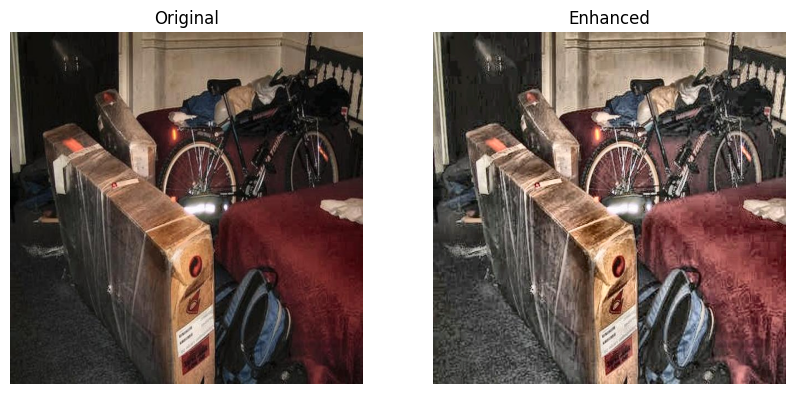

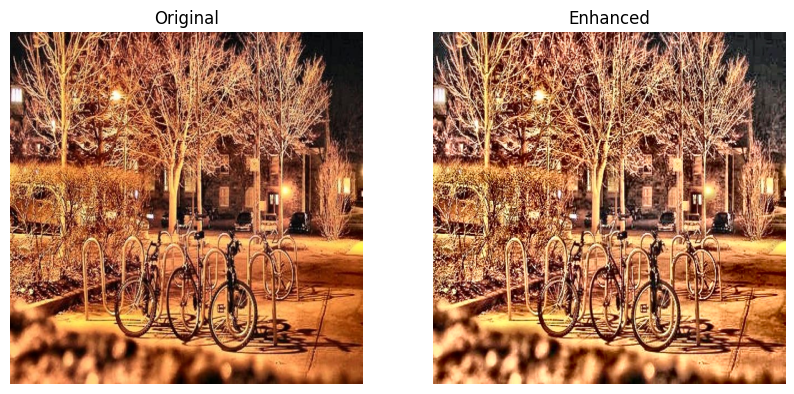

In [ ]:
examples = sorted(os.listdir(input_dir))[:2]
for fname in examples:
    # Skip non-image files like .DS_Store
    if not fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        print(f"Skipping non-image file: {fname}")
        continue

    img   = cv2.imread(os.path.join(input_dir, fname))

    # Check if the image was loaded successfully
    if img is None:
        print(f"Warning: Could not read image file: {fname}")
        continue

    enh   = enhance_low_light(img, gamma=0.8)

    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original'); axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(enh, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Enhanced'); axes[1].axis('off')
    plt.show()

In [ ]:
for fname in tqdm(os.listdir(input_dir), desc='Enhancing images'):
    img = cv2.imread(os.path.join(input_dir, fname))
    if img is None: continue
    cv2.imwrite(os.path.join(output_dir, fname),
                enhance_low_light(img, gamma=0.5))

print(f"Enhanced images saved to:\n  {output_dir}")

Enhancing images: 100%|██████████| 629/629 [00:27<00:00, 22.86it/s]

Enhanced images saved to:
  /content/drive/MyDrive/datasets/enhanced_images1
